In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.gaussian_process.kernels import RBF

In [2]:
#Create the data
rng = np.random.RandomState(0)

# Generate sample data
X = 20 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise

## Gaussian process Regression

$$K(x_{i},x_{j}) = exp\left(-\frac{\left \langle x_{i},x_{j}\right \rangle}{2l^2}\right)$$

In [3]:
gp_kernel = RBF(1.0,length_scale_bounds=(10,10))
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

Time for GPR fitting: 0.060


In [4]:
# Predict using gaussian process regressor
X_plot = np.linspace(0, 20, 10000)[:, None]
stime = time.time()
y_gpr = gpr.predict(X_plot, return_std=False)
print("Time for GPR prediction: %.3f" % (time.time() - stime))

Time for GPR prediction: 0.083


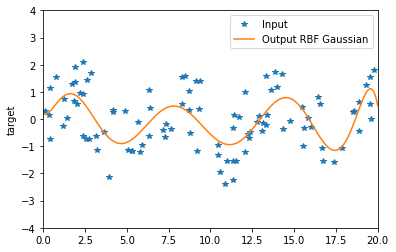

In [5]:
plt.plot(X,y,'*',label='Input')
plt.plot(X_plot,y_gpr,label='Output RBF Gaussian')
plt.ylabel('target')
plt.xlim(0, 20)
plt.ylim(-4, 4)
plt.legend()
plt.show()

$$K(x_{i},x_{j}) = exp\left(-\frac{2 sin^2(\pi\left \langle x_{i},x_{j}\right \rangle)/p}{l^2}\right)$$

In [6]:
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))\
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

Time for GPR fitting: 0.216


In [7]:
# Predict using gaussian process regressor
X_plot = np.linspace(0, 20, 10000)[:, None]
stime = time.time()
y_gpr = gpr.predict(X_plot, return_std=False)
print("Time for GPR prediction: %.3f" % (time.time() - stime))

Time for GPR prediction: 0.135


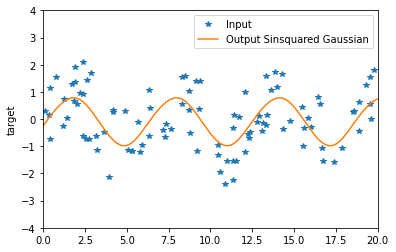

In [8]:
plt.plot(X,y,'*',label='Input')
plt.plot(X_plot,y_gpr,label='Output Sinsquared Gaussian')
plt.ylabel('target')
plt.xlim(0, 20)
plt.ylim(-4, 4)
plt.legend()
plt.show()

## Gaussiand process Classification

$$K(x_{i},x_{j}) = exp\left(-\frac{\left \langle x_{i},x_{j}\right \rangle}{2l^2}\right)$$ $$ K(x_i ,x_j)= \sigma_{0}^2 + x_i*x_j$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

In [12]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

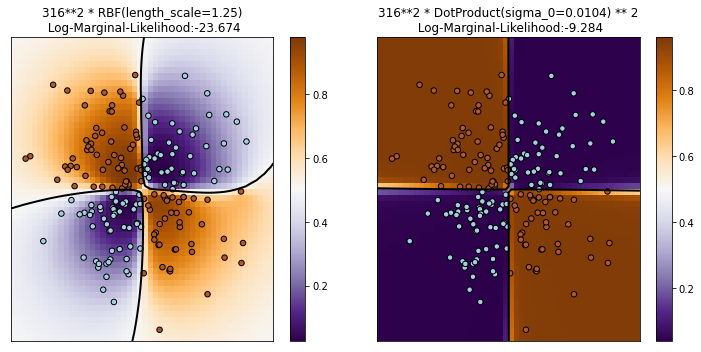

In [13]:

# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.0), 1.0 * DotProduct(sigma_0=1.0)**2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2,
                           colors=['k'])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title("%s\n Log-Marginal-Likelihood:%.3f"
              % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
              fontsize=12)

plt.tight_layout()
plt.show()